In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed

### Class: Perceptron

In [5]:
# Define a class called Perceptron 

class Perceptron(object):
    """ Perceptron classifier
    
    Parameters:
    ----------------
    eta    : Learning Rate (betweem 0.0 and 1.0)
    n_iter : Passes over training set
    
    Attributes:
    ----------------
    w_ : 1d-array
         Weights after fitting

    errors_ : list
              aNumber of misclassifications in each epochs    
    
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fitting training data
        
        Parameters:
        -----------------
        X : {Array-like}, shape [n_samples, n_features] (n x m); Input data
        y : {Array-like}, shape [n_samples] (n x 1)  : Input labels (Targets)
        
        Returns:
        -----------------
        self : object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self,X):
        """Return class label after each unit step """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    
    
    

### Class Adaptive Linear Neuron

In [43]:
class AdalineGD(object):
    """Adaptive Linear Neuron Classifier
    
    Parameters:
    -------------------------------------
    eta:Float
        Learning Rate (0.0 - 1.0)
    n_iter:int
        Passes over training dataset
        
    Attributes:
    -------------------------------------
    
    w_: 1-d array
        Weights after filtering
    
    cost_: list
        Number of misclassification in every epoch    
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit the training data
        
        Parameters:
        -------------------------------------------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors
        y: array-like, shape = [n_samples]
            Target values
            
        Returns:
        -------------------------------------------
        self: object
        """
        
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
            
        return self
            
            
    def net_input(self,X):
        return (np.dot(X,self.w_[1:]) + self.w_[0])
        
    def activation(self,X):
        return self.net_input(X)
    
    def predict(self,X):
        return np.where(self.activation(X) >= 0.0, 1,-1)
        

### Class Adaline Stochastic Gradient

In [61]:
class AdalineSGD(object):
    """Adaptive Linear Neuron Classifier
    
    Parameters:
    -------------------------------------
    eta:Float
        Learning Rate (0.0 - 1.0)
    n_iter:int
        Passes over training dataset
        
    Attributes:
    -------------------------------------
    
    w_: 1-d array
        Weights after filtering
    
    cost_: list
        Number of misclassification in every epoch    
    
    shuffle: Bool (default: True)
        Shuffles training data every epoch
        
    random_state: int (default:None)
        Sets random state for shuffling and init of weights
    
    """
    
    
    def __init__(self, eta = 0.01, n_iter = 50, shuffle = True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.w_initialized = False
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit the training data
        
        Parameters:
        -------------------------------------------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors
        y: array-like, shape = [n_samples]
            Target values
            
        Returns:
        -------------------------------------------
        self: object
        """
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if(self.shuffle):
                X,y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        
        return self
        
        
    def partial_fit(self,X,y):
        """Fit training data without reinitializing weights"""
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self.update_weights(xi,target)
        else:
            self.update_weights(X,y)
            
        return self
        
    def _shuffle(self,X,y):
        """Shuffle training data """
        r = np.random.permutation(len(y))
        return X[r], y[r]
        
    def _initialize_weights(self,m):
        """Initialize weights to 0 """
        
        self.w_ = np.zeros(1 + m)
        self.w_initalized = True
        
    def _update_weights(self,xi,target):
        """Apply Adaline GD """
        
        output = self.net_input(xi)
        errors = (target - output)
        self.w_[1:] += self.eta * xi.dot(errors)
        self.w_[0] += self.eta * errors
        cost = (errors**2)/2.0
                    
        return cost
            
            
    def net_input(self,X):
        return (np.dot(X,self.w_[1:]) + self.w_[0])
        
    def activation(self,X):
        return self.net_input(X)
    
    def predict(self,X):
        return np.where(self.activation(X) >= 0.0, 1,-1)

### Function: Plot Decision Regions

In [7]:
# Defining class for plotting decision regions of a classifier
def plot_decision_regions(X,y,classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','green','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), 
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1.shape)
    #print(xx1.ravel().shape)
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0], y=X[y==c1,1], alpha=0.8, 
                        c=cmap(idx), marker=markers[idx], label=c1)



### Iris Dataset

In [8]:
# Download the IRIS dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
# Enter the train size
trainSize = 100

# Labels extraction from DF
y = df.iloc[0:trainSize,4].values

# Convert into labels
y = np.where(y == 'Iris-setosa',-1, 1)
#print(y)
print('Labels size of training data:',len(y))


Labels size of training data: 100


In [10]:
# Prepare training data
X = df.iloc[0:trainSize,[0,2]].values
print('Train size of training data:',X.shape[0])
print('Feature size of training data:',X.shape[1])


Train size of training data: 100
Feature size of training data: 2


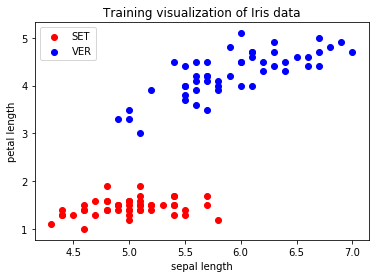

In [30]:
# Plot the training data
plt.scatter(X[0:50,0],X[0:50,1],color='red',label='SET')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',label='VER')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('Training visualization of Iris data')
plt.legend(loc='upper left')
plt.show()

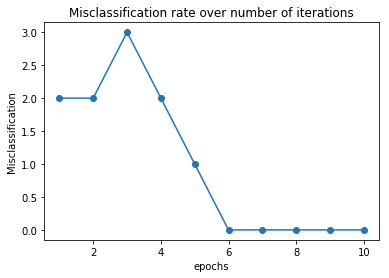

In [11]:
# Train a classifier
ppn = Perceptron()
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('epochs')
plt.ylabel('Misclassification')
plt.title('Misclassification rate over number of iterations')
plt.show()

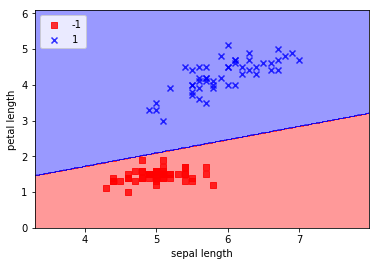

In [55]:
# Contour map 
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

### Testing Adaline GD

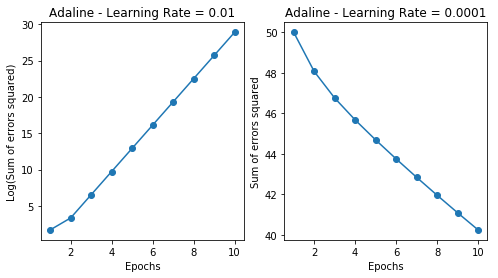

In [44]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ada1 = AdalineGD(eta=0.01, n_iter=10).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(Sum of errors squared)')
ax[0].set_title('Adaline - Learning Rate = 0.01')

ada2 = AdalineGD(eta=0.0001, n_iter=10).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum of errors squared')
ax[1].set_title('Adaline - Learning Rate = 0.0001')

plt.show()

### Data Normalization

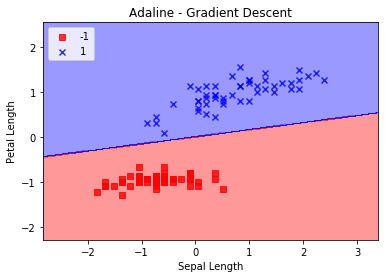

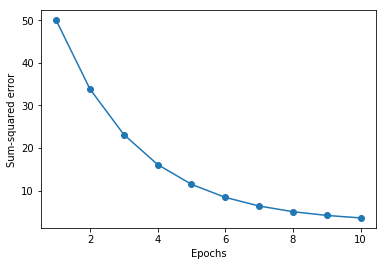

In [45]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/ X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/ X[:,1].std()

ada = AdalineGD(n_iter=10, eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1,len(ada.cost_)+1), ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared error')
plt.show()

### Testing Stochastic Gradient Descent 

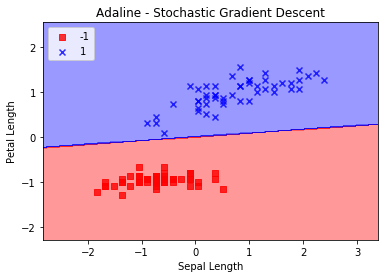

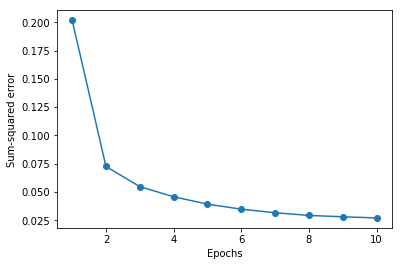

In [62]:
ada = AdalineSGD(n_iter=10, eta=0.01, shuffle=True,random_state=1)
ada.fit(X_std,y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1,len(ada.cost_)+1), ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared error')
plt.show()